In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NEXTLAB /chrome_reviews.csv')

In [ ]:
data.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [ ]:
data.shape

(7204, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [ ]:
data.Text.head()

0                        This is very helpfull aap.
1                                              Good
2    Not able to update. Neither able to uninstall.
3                                          Nice app
4                                 Many unwanted ads
Name: Text, dtype: object

In [ ]:
data.isnull().sum()

ID                    0
Review URL            0
Text                  1
Star                  0
Thumbs Up             0
User Name             0
Developer Reply    7109
Version              85
Review Date           0
App ID                0
dtype: int64

In [ ]:
data=data.drop(['Developer Reply','Thumbs Up','User Name','Review URL','ID','Version','Review Date','App ID'],axis=1)

In [ ]:
data.shape

(7204, 2)

In [ ]:
data.isnull().sum()

Text    1
Star    0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

Text    0
Star    0
dtype: int64

### **Text Preprocessing**

In [ ]:
!pip install textblob

In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
#Lower casing and removing punctuations
data['Text']= data['Text'].apply(lambda x: " ".join(x.lower() for
                                                    x in x.split()))

In [ ]:
data['Text'] = data['Text'].str.replace('[^\w\s]', "")
data.Text.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0                       this is very helpfull aap
1                                            good
2    not able to update neither able to uninstall
3                                        nice app
4                               many unwanted ads
Name: Text, dtype: object

## **Removal Of Stop Words**


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in 
                                                     x.split() if x not in stop))
data.Text.head()

0                          helpfull aap
1                                  good
2    able update neither able uninstall
3                              nice app
4                     many unwanted ads
Name: Text, dtype: object

## **Spelling Correction**
### **Lemmatization**

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data.Text.head()

0                          helpfull aap
1                                  good
2    able update neither able uninstall
3                              nice app
4                      many unwanted ad
Name: Text, dtype: object

In [ ]:
data.columns

Index(['Text', 'Star'], dtype='object')

In [ ]:
import seaborn as sns
data.Star.value_counts()

5    3870
1    1894
4     652
3     451
2     336
Name: Star, dtype: int64

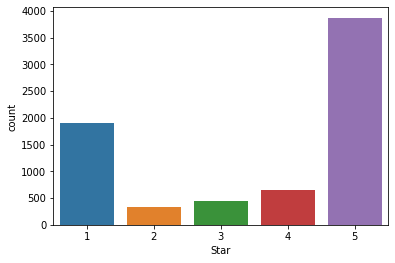

In [ ]:
import seaborn as sns
sns.countplot(data=data,x='Star')


## **Sentiment Score**

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [ ]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in data['Text']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,0.000,1.000,0.4404
2,0.000,1.000,0.000,0.0000
3,0.000,0.263,0.737,0.4215
4,0.487,0.513,0.000,-0.2263


In [ ]:
# Merging the sentiments back to reviews dataframe
data_c = pd.concat([data.reset_index(drop=True), df_sentiments], axis=1)
data_c.head(20)

,Text,Star,neg,neu,pos,compound
0,helpfull aap,5,0.000,1.000,0.000,0.0000
1,good,3,0.000,0.000,1.000,0.4404
2,able update neither able uninstall,1,0.000,1.000,0.000,0.0000
3,nice app,4,0.000,0.263,0.737,0.4215
4,many unwanted ad,1,0.487,0.513,0.000,-0.2263
5,app good,4,0.000,0.256,0.744,0.4404
6,yes yes,5,0.000,0.000,1.000,0.6597
7,awesome,5,0.000,0.000,1.000,0.6249
8,bad app,1,0.778,0.222,0.000,-0.5423
9,many time tried update updating whenever try u...,1,0.000,0.909,0.091,0.0516


In [ ]:
# Convert scores into positive and negetive sentiments using some threshold
data_c['Sentiment'] = np.where(data_c['compound'] >= 0 , 'Positive','Negative')
data_c.head(50)

,Text,Star,neg,neu,pos,compound,Sentiment
0,helpfull aap,5,0.000,1.000,0.000,0.0000,Positive
1,good,3,0.000,0.000,1.000,0.4404,Positive
2,able update neither able uninstall,1,0.000,1.000,0.000,0.0000,Positive
3,nice app,4,0.000,0.263,0.737,0.4215,Positive
4,many unwanted ad,1,0.487,0.513,0.000,-0.2263,Negative
5,app good,4,0.000,0.256,0.744,0.4404,Positive
6,yes yes,5,0.000,0.000,1.000,0.6597,Positive
7,awesome,5,0.000,0.000,1.000,0.6249,Positive
8,bad app,1,0.778,0.222,0.000,-0.5423,Negative
9,many time tried update updating whenever try u...,1,0.000,0.909,0.091,0.0516,Positive


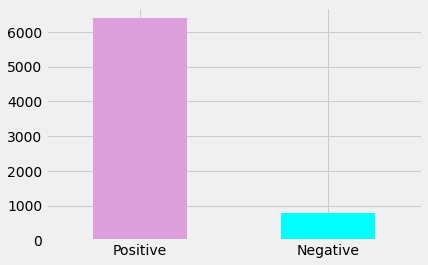

In [ ]:
result=data_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);

In [ ]:
# feature selection
label = "Sentiment"
ignore_cols = [label, "Text", "text_clean"]
features = [c for c in data_c.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_c[features], data_c[label], test_size = 0.20, random_state = 42)


In [ ]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
4,compound,0.615453
1,neg,0.301882
3,pos,0.029864
0,Star,0.028495
2,neu,0.024305


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


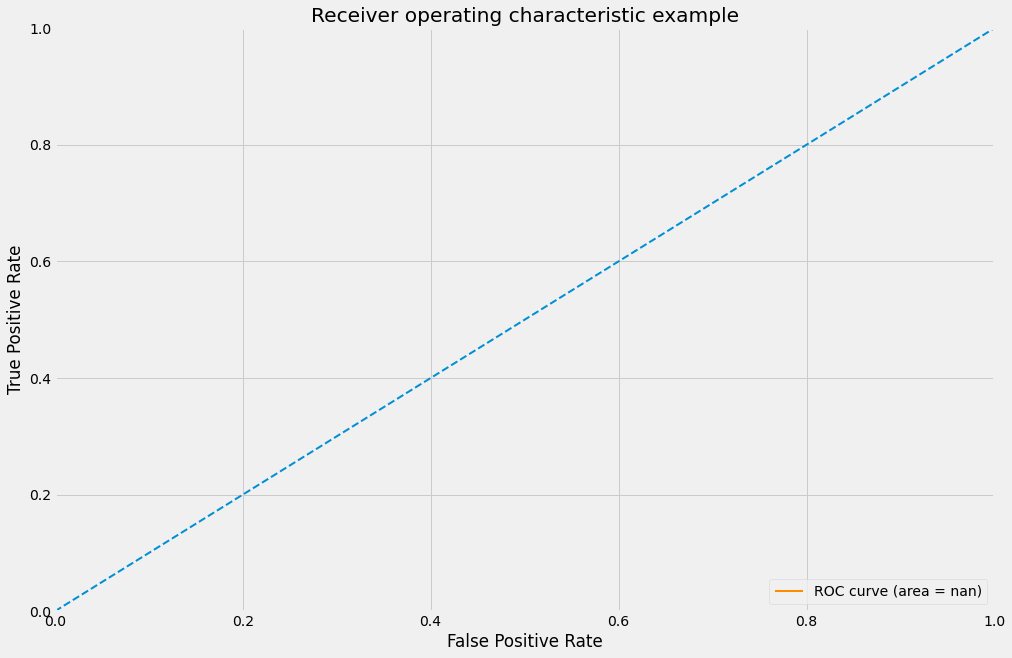

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install funcsigs

In [ ]:

from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

ValueError: ignored